# OCR(Optical Character Recognition)
- 광학 문자 인식

## 사용사례
- 우편번호 추출을 통한 우편물 관리
- 자동차 번호판 인식
- 모바일 기기를 사용한 명함 인식
- 신용카드 읽기를 이용한 결제 서비스
- 컨테이너 일련번호 인식을 이용한 스마트 선박 시스템

## 기계가 문자를 읽는 과정
1. Text Detection(문자검출) : 입력받은 사진 속에서 문자의 위치를 찾아내는 것
2. Text Recognition(문자인식) : 찾은 문자 영역으로부터 문자를 읽어내는 것

## 문자의 영역을 표현하는 방법
- 축에 정렬된 사각형인 Bounding box
- 돌아간 사각형 Oriented bounding box
- 자유로운 사각형은 Quadrangle 
- 다각형인 Polygon
- Pixel 수준으로 영역을 표현한 Mask                                          

# 다양한 OCR모델 비교하기
- 와인 분류기
- 와인 종류가 워낙 많아서 와인병의 이름을 인식해서 와인을 분류할 수 있는 프로그램을 생각하게 됨
- 이미 삼성 카메라에 와인 분류하는 프로그램이 있어서 직접 사용해보고 비슷한 모델로 만들려고 함

# 1. 검증용 데이터셋 준비

In [1]:
import os
import pytesseract
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import keras_ocr
import tensorflow as tf

print(keras_ocr.__version__)
print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.
# !sudo apt install tesseract-ocr

0.8.8
0.3.8


In [2]:
data_path = os.getenv('HOME')+ '/aiffel/ocr_python/wine'
data_path

'/aiffel/aiffel/ocr_python/wine'

In [3]:
# 입력 이미지 경로 
file_list = os.listdir(data_path)
file_path = [data_path+'/'+name for name in file_list]
file_path = sorted(file_path)
file_path

['/aiffel/aiffel/ocr_python/wine/wine1.png',
 '/aiffel/aiffel/ocr_python/wine/wine2.png',
 '/aiffel/aiffel/ocr_python/wine/wine3.png',
 '/aiffel/aiffel/ocr_python/wine/wine4.png',
 '/aiffel/aiffel/ocr_python/wine/wine5.png']

In [4]:
image_titles = []
images = []
for filename in file_path:
    image = cv2.imread(filename)
    images.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    image_titles.append(os.path.splitext(os.path.basename(filename))[0])
image_titles

['wine1', 'wine2', 'wine3', 'wine4', 'wine5']

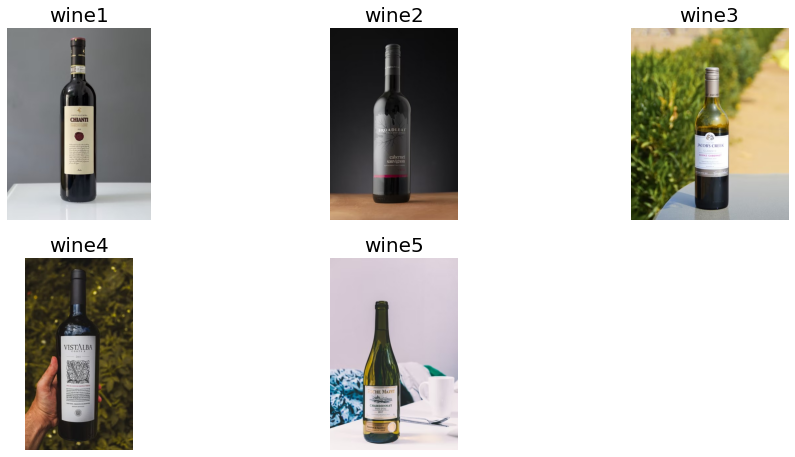

In [5]:
# 테스트 이미지 시각화
plt.figure(figsize=(16, 12))
for i, (image, title) in enumerate(zip(images, image_titles)):
    plt.subplot(3, 3, i+1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(title, fontsize=20)

# 2. keras-ocr, Tesseract로 테스트 진행

# 2-1. keras-ocr

In [6]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [7]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
  'https://images.unsplash.com/photo-1592845148519-b0d41df97ac2?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=387&q=80',
    'https://images.unsplash.com/photo-1610631787813-9eeb1a2386cc?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=435&q=80',
    'https://images.unsplash.com/photo-1606657765076-44154cfec14d?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=477&q=80',
    'https://images.unsplash.com/photo-1584493306744-5fe6e59bc77b?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=327&q=80',
    'https://images.unsplash.com/photo-1548701427-ce7529d732b7?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=387&q=80'
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

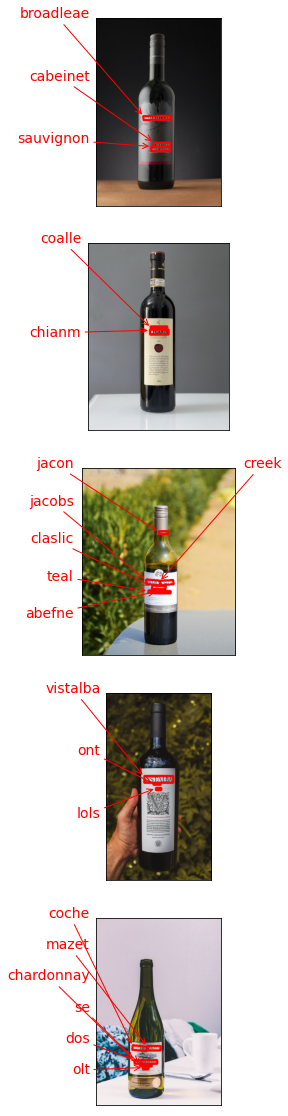

In [8]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

- keras-ocr은 한글 데이터셋으로 훈련이 되어있지 않은 모델이라서 한글을 인식을 못함

# 2-2. Tesseract

In [9]:
import os
 
img_dir = os.getenv('HOME')+'/aiffel/ocr_python/wine'
file_list = os.listdir(img_dir)
file_list

['wine4.png', 'wine2.png', 'wine3.png', 'wine1.png', 'wine5.png']

In [10]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

def recognize_images(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")

            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1

    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [11]:
save_dir = os.getenv('HOME')+'/aiffel/ocr_python/tesseract_cropped'

for file in file_list:
    print(f'[{file}]')
    try:
        recognize_images(os.path.join(img_dir, file), save_dir)
        print('----------------------------------------------')
    except:
        print(f'Cannot recognize characters from {file}')

[wine4.png]
74 | s

Done
----------------------------------------------
[wine2.png]
Cannot recognize characters from wine2.png
[wine3.png]

Done
----------------------------------------------
[wine1.png]
;

Done
----------------------------------------------
[wine5.png]
_

Done
----------------------------------------------


# 3. 결론 및 회고
- 이번 프로젝트에서는 OCR 기술을 적용한 서비스를 기획해보고 그 서비스와 관련된 이미지 데이터셋에 대해 OCR 기술을 적용해보았다.

- 와인 데이터를 이용하여 와인을 분류해주는 서비스를 기획했다. 대표적인 OCR 모델인 keras-ocr, Tesseract을 활용하였고, 서비스에 부합하는 다양한 이미지셋에 대해 성능이 가장 좋은 모델을 찾기 위해 노력했다.

- 결과적으로, 작은 글씨,어두운 라벨의 와인이름, 다양한 배경 등 다양한 이미지를 가장 잘 인식하는 모델은 keras-ocr 이었다.

- keras-ocr 모델은 문자 자체는 잘 인식했으나, 영어만 인식할 수 있어서 한국어로만 되어있는 간판은 전혀 인식하지 못했고 번역 서비스로 확장할 수 없다는 한계가 있었다.

- Tesseract모델은 한글과 영어 모두 지원했으나 문자 인식 정확도 자체가 떨어지는 것을 볼 수 있었고 영어를 인식할지 한글을 인식할지 직접 지정을 해주어야 한다는 점에서 불편함이 있었다.정확도가 현저히 떨어졌고,  keras-ocr 에 비해 성능이 낮았다.

- 구글의 클라우드 기반 OCR API 데모를 이용하여 다음과 같은 결과를 얻을 수 있었다.     
  (https://cloud.google.com/vision)
  
  다른 모델에 비해 글자를 인식하는데 정확도가 높은 것을 확인할 수 있다.
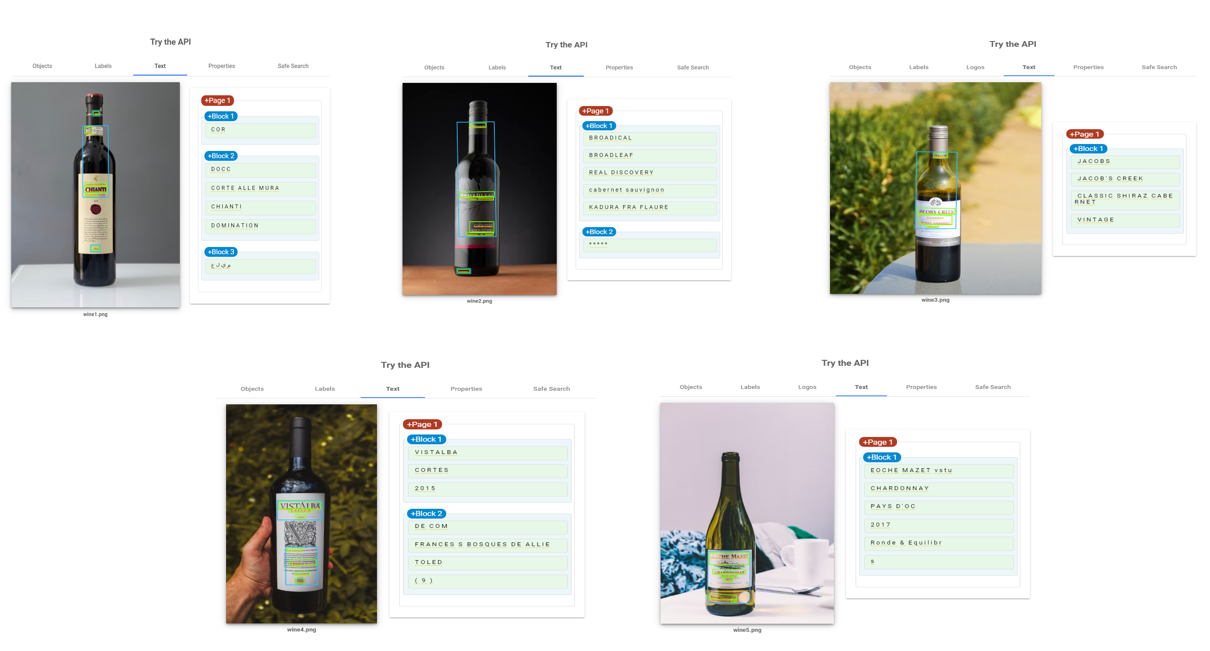

- 구글 OCR API까지 포함하여 모델을 비교하자면 **Tesseract > keras-ocr > 구글 OCR API** 순으로 글자 인식에 대한 정확도가 높았다.